In [62]:
import pandas as pd

wine = pd.read_csv('D:\PhythonPathWS\Wine\wine.csv')

wine.head() 

# 공백 '-'로 메꿔주기
wine.columns = wine.columns.str.replace(' ','_')



In [12]:
#그룹 비교하기
wine.groupby('type')['quality'].describe()

wine.groupby('type')['quality'].mean()

wine.groupby('type')['quality'].std()

# mean() std() 묶어서 사용하기
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


In [21]:
from scipy import stats
from statsmodels.formula.api import ols, glm

red_wine_quality = wine.loc[wine['type'] == 'red','quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

# 종속 변수와 독립 변수 구성
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'


In [24]:
# 선형회귀
regression_result = ols(Rformula, data=wine).fit()

# 통계값 출력
regression_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        16:39:22   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
sample1 = wine[wine.columns.difference(['quality','type'])]
sample1= sample1[0:5][:]
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [38]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [49]:
data = {"fixed_acidity" :[8.5, 8.1], "volatile_acidity" : [0.8, 0.5], "citric_acid" : [0.3, 0.4], "residual_sugar" : [6.1, 5.8], "chlorides" :[0.05,0.04], "free_sulfur_dioxide" : [30.20, 31.0], "total_sulfur_dioxide" : [98.0, 99], "density" : [0.996, 0.91], "pH" : [3.25, 3.01], "sulphates" : [0.4, 0.35], "alcohol" : [9.0, 0.88]}
sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.05,0.3,0.996,8.5,30.2,3.25,6.1,0.40,98.0,0.8
1,0.88,0.04,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [51]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.812707
1    7.582129
dtype: float64

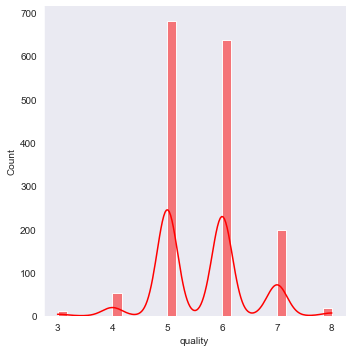

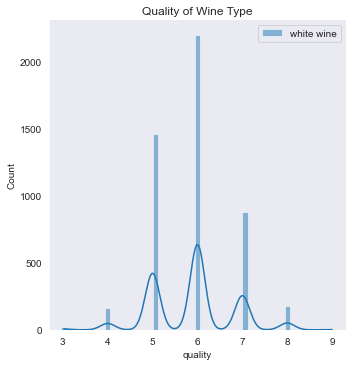

In [57]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.displot(red_wine_quality, kde = True, color = "red", label = 'red wine')
sns.displot(white_wine_quality, kde = True, label = 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

eval_env: 1


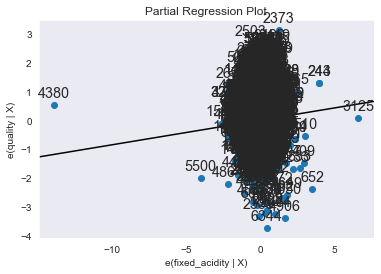

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

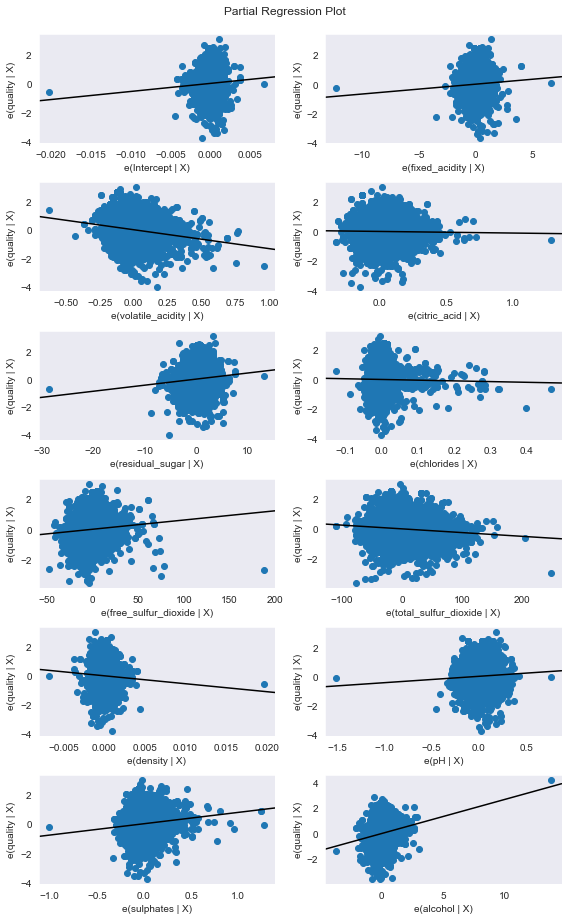

In [61]:
# 부분회귀계산
import statsmodels.api as sm
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)

plt.show()

fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)
plt.show